# **Old Car Price Prediction**

An automobile company contracted an automobile consulting company to understand the factors on which the pricing of old cars depend.
Which variables are significant in predicting the price of a car. We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the business strategy and understand the pricing dynamics of a new market.

In [ ]:
# import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import data
car = pd.read_csv('https://github.com/ybifoundation/Dataset/raw/main/Car%20Price.csv')

In [ ]:
car.head()

,Brand,Model,Year,Selling_Price,KM_Driven,Fuel,Seller_Type,Transmission,Owner
0,Maruti,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Brand          4340 non-null   object
 1   Model          4340 non-null   object
 2   Year           4340 non-null   int64 
 3   Selling_Price  4340 non-null   int64 
 4   KM_Driven      4340 non-null   int64 
 5   Fuel           4340 non-null   object
 6   Seller_Type    4340 non-null   object
 7   Transmission   4340 non-null   object
 8   Owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


In [ ]:
# high std of selling price and km driven
car.describe()

,Year,Selling_Price,KM_Driven
count,4340.000000,4.340000e+03,4340.000000
mean,2013.090783,5.041273e+05,66215.777419
std,4.215344,5.785487e+05,46644.102194
min,1992.000000,2.000000e+04,1.000000
25%,2011.000000,2.087498e+05,35000.000000
50%,2014.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


In [ ]:
car.Selling_Price.std()

578548.7361388865

In [ ]:
car.corr()

,Year,Selling_Price,KM_Driven
Year,1.000000,0.413922,-0.419688
Selling_Price,0.413922,1.000000,-0.192289
KM_Driven,-0.419688,-0.192289,1.000000


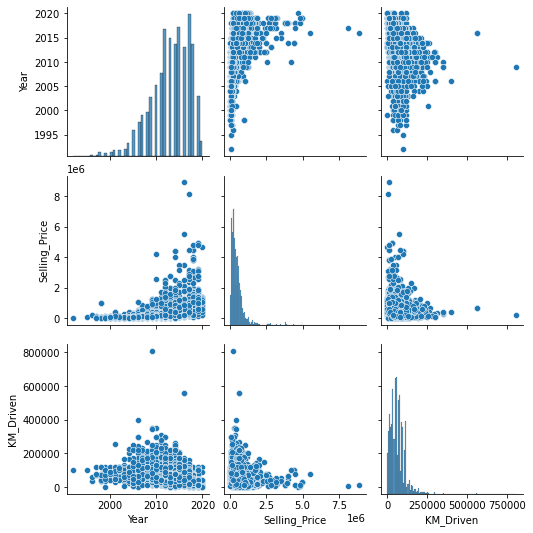

In [ ]:
sns.pairplot(car)

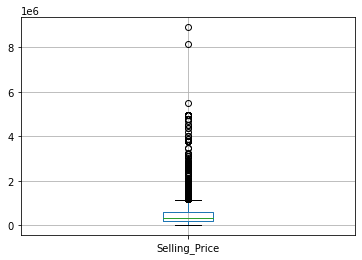

In [ ]:
# boxplot for outliers
car.boxplot('Selling_Price')

In [ ]:
np.log(car['Selling_Price']).std()

0.8392653516128741

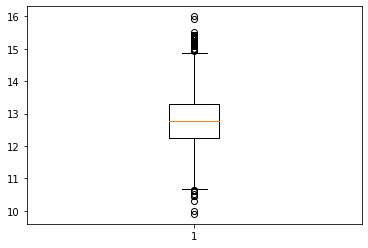

In [ ]:
fig, ax = plt.subplots()
ax.boxplot(np.log(car['Selling_Price']));

In [ ]:
car.Brand.value_counts()

Maruti           1280
Hyundai           821
Mahindra          365
Tata              361
Honda             252
Ford              238
Toyota            206
Chevrolet         188
Renault           146
Volkswagen        107
Skoda              68
Nissan             64
Audi               60
BMW                39
Fiat               37
Datsun             37
Mercedes-Benz      35
Jaguar              6
Mitsubishi          6
Land                5
Volvo               4
Ambassador          4
Jeep                3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: Brand, dtype: int64

In [ ]:
car.loc[~car['Brand'].str.contains('Maruti|Hyundai|Mahindra|Tata|Honda|Ford|Toyota'), 'Brand']='Others'

In [ ]:
car.Brand.value_counts()

Maruti      1236
Hyundai      805
Mahindra     365
Tata         360
Honda        252
Ford         238
Toyota       205
Name: Brand, dtype: int64

In [ ]:
car.drop((car.index[car.Brand.str.contains('Others')]), axis=0, inplace=True)

In [ ]:
car.Brand.value_counts()

Maruti      1280
Hyundai      821
Mahindra     365
Tata         361
Honda        252
Ford         238
Toyota       206
Name: Brand, dtype: int64

In [ ]:
car.Model.value_counts()

Maruti Swift Dzire VDI           69
Maruti Alto 800 LXI              59
Maruti Alto LXi                  47
Maruti Alto LX                   35
Hyundai EON Era Plus             35
                                 ..
Maruti Alto K10 LX                1
Mahindra XUV500 W6 1.99 mHawk     1
Ford Figo Petrol LXI              1
Mahindra Jeep Classic             1
Hyundai i20 Magna 1.4 CRDi        1
Name: Model, Length: 1148, dtype: int64

In [ ]:
car.Model.nunique()

1148

In [ ]:
car.loc[~car['Model'].str.contains('Maruti|Hyundai|Mahindra|Tata|Honda|Ford|Toyota'), 'Model']='Others'

In [ ]:
car.Model.value_counts()

Maruti Swift Dzire VDI           69
Maruti Alto 800 LXI              59
Maruti Alto LXi                  47
Maruti Alto LX                   35
Hyundai EON Era Plus             35
                                 ..
Maruti Alto K10 LX                1
Mahindra XUV500 W6 1.99 mHawk     1
Ford Figo Petrol LXI              1
Mahindra Jeep Classic             1
Hyundai i20 Magna 1.4 CRDi        1
Name: Model, Length: 1148, dtype: int64

In [ ]:
car.Model.nunique()

1148

In [ ]:
car.drop('Model',axis=1, inplace=True)

In [ ]:
car.Fuel.value_counts()

Petrol    1824
Diesel    1637
Name: Fuel, dtype: int64

In [ ]:
car.drop((car.index[car.Fuel.str.contains('CNG|LPG|Electric')]), axis=0, inplace=True)

In [ ]:
car.Seller_Type.value_counts()

Individual          2646
Dealer               715
Trustmark Dealer     100
Name: Seller_Type, dtype: int64

In [ ]:
car.loc[car.Seller_Type.str.contains('Trustmark Dealer'),'Seller_Type']='Dealer'

In [ ]:
car.Transmission.value_counts()

Manual       3224
Automatic     237
Name: Transmission, dtype: int64

In [ ]:
car.Owner.value_counts()

First Owner             2243
Second Owner             881
Third Owner              254
Fourth & Above Owner      68
Test Drive Car            15
Name: Owner, dtype: int64

In [ ]:
car.loc[car.Owner.str.contains('Third Owner|Fourth & Above Owner|Test Drive Car'),'Owner']= 'Others'

In [ ]:
car.Owner.value_counts()

First Owner     2243
Second Owner     881
Others           337
Name: Owner, dtype: int64

In [ ]:
car.select_dtypes(object).columns

Index(['Brand', 'Fuel', 'Seller_Type', 'Transmission', 'Owner'], dtype='object')

In [ ]:
car= pd.get_dummies(car, columns=car.select_dtypes(object).columns, drop_first=True)

In [ ]:
car.head()

,Year,Selling_Price,KM_Driven,Brand_Honda,Brand_Hyundai,Brand_Mahindra,Brand_Maruti,Brand_Tata,Brand_Toyota,Fuel_Petrol,Seller_Type_Individual,Transmission_Manual,Owner_Others,Owner_Second Owner
0,2007,60000,70000,0,0,0,1,0,0,1,1,1,0,0
1,2007,135000,50000,0,0,0,1,0,0,1,1,1,0,0
2,2012,600000,100000,0,1,0,0,0,0,0,1,1,0,0
4,2014,450000,141000,1,0,0,0,0,0,0,1,1,0,1
5,2007,140000,125000,0,0,0,1,0,0,1,1,1,0,0


In [ ]:
car.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3461 entries, 0 to 4338
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Year                    3461 non-null   int64
 1   Selling_Price           3461 non-null   int64
 2   KM_Driven               3461 non-null   int64
 3   Brand_Honda             3461 non-null   uint8
 4   Brand_Hyundai           3461 non-null   uint8
 5   Brand_Mahindra          3461 non-null   uint8
 6   Brand_Maruti            3461 non-null   uint8
 7   Brand_Tata              3461 non-null   uint8
 8   Brand_Toyota            3461 non-null   uint8
 9   Fuel_Petrol             3461 non-null   uint8
 10  Seller_Type_Individual  3461 non-null   uint8
 11  Transmission_Manual     3461 non-null   uint8
 12  Owner_Others            3461 non-null   uint8
 13  Owner_Second Owner      3461 non-null   uint8
dtypes: int64(3), uint8(11)
memory usage: 274.4 KB


In [ ]:
y = np.log(car['Selling_Price'])

In [ ]:
X = car.drop('Selling_Price',axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=2529)

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
lr.intercept_

-218.17188112497672

In [ ]:
lr.coef_

array([ 1.15067438e-01, -8.83381466e-07,  1.89065007e-01, -1.39294029e-02,
        1.51814590e-01, -1.15577657e-01, -4.69633850e-01,  5.82973893e-01,
       -4.11750646e-01, -1.16952407e-01, -3.47401486e-01, -1.04543631e-01,
       -5.65986042e-02])

In [ ]:
y_pred = lr.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_percentage_error, r2_score

In [ ]:
mean_absolute_percentage_error(y_test,y_pred)

0.025492572313019032

In [ ]:
r2_score(y_test,y_pred)

0.75387218714618

In [ ]:
import statsmodels.api as sm

In [ ]:
X = sm.add_constant(X)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [ ]:
model = sm.OLS(y,X)

In [ ]:
print(model.fit().summary())

                            OLS Regression Results                            
Dep. Variable:          Selling_Price   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     846.5
Date:                Sat, 15 Oct 2022   Prob (F-statistic):               0.00
Time:                        09:43:10   Log-Likelihood:                -1674.4
No. Observations:                3461   AIC:                             3377.
Df Residuals:                    3447   BIC:                             3463.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                   -217